In [6]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [7]:
from random import randint
num = randint(1, 10)

In [8]:
import io
def get_curve(txt):
    out = io.BytesIO(txt)
    out.seek(0)
    return np.load(out)

In [9]:
# cesta k .db suboru - zmenit na spravnu cestu
FILEPATH = '/home/jovyan/data/lightning/data-upjs/detached.db'
# vytvorenie connection na subor .db v sqllite formate
conn = sqlite3.connect(FILEPATH)

In [10]:
# nacitanie ake su tabulky v databaze (to len aby bolo jasne ako sa to zistit - realne su dve - parameters a curves)
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

[('parameters',), ('curves',), ('auxiliary',)]


In [11]:
df_parameters = pd.read_sql_query("SELECT id, overcontact FROM parameters", conn)

In [12]:
df_parameters.head(70)

,id,overcontact
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
65,65,0
66,66,0
67,67,0
68,68,0


In [13]:
df_parameters.shape

(2255950, 2)

In [14]:
for col in df_parameters.columns:
    print(col)

id
overcontact


In [ ]:
df_curves = pd.read_sql_query("SELECT * FROM curves ORDER BY RANDOM() LIMIT 50000", conn)
conn.close()

In [6]:
df_curves = pd.read_sql_query("SELECT COUNT(*) FROM curves", conn)
conn.close()

In [7]:
df_curves.shape
print(df_curves)

   COUNT(*)
0   2255946


In [8]:
df_curves.head()

,COUNT(*)
0,2255946


In [ ]:
my_curve_values = np.frombuffer(df_curves["Bessell_U"])
my_curve_values1 = get_curve(df_curves["Bessell_U"])
print(my_curve_values)

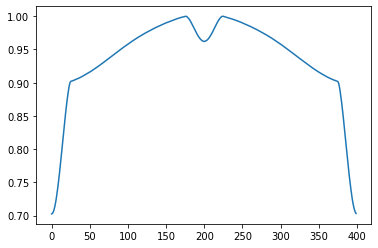

In [14]:
plt.plot(my_curve_values[16:])
plt.show()

In [15]:
row = df_curves.iloc[7800]
row_curves = row[1:]
my_curves = row_curves.apply(get_curve) 
print(my_curves)

Bessell_U    [0.12064110400069336, 0.15898650360120184, 0.2...
Bessell_B    [0.12698234834382757, 0.16383202440674055, 0.2...
Bessell_V    [0.14087822737249736, 0.17693748203808835, 0.2...
Bessell_R    [0.15226039768550337, 0.18798259308930163, 0.2...
Bessell_I    [0.17600699493148514, 0.21075627777921835, 0.2...
SLOAN_u      [0.1199706931619569, 0.15845654086416347, 0.24...
SLOAN_g      [0.1308062487234134, 0.1673852205952632, 0.245...
SLOAN_r      [0.14997092696582773, 0.18576685236359872, 0.2...
SLOAN_i      [0.16760204987032076, 0.20279148118423276, 0.2...
SLOAN_z      [0.185245645755156, 0.21951555359520922, 0.291...
Kepler       [0.14389373061681535, 0.17991326231396892, 0.2...
GaiaDR2      [0.13980819940260786, 0.1761671491315813, 0.25...
TESS         [0.16182782841621798, 0.19692642031181995, 0.2...
Name: 7800, dtype: object


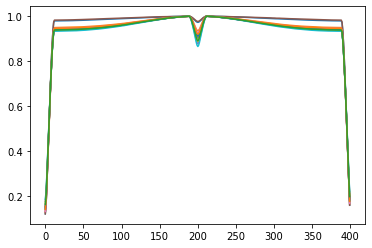

In [16]:
for c in my_curves:
    plt.plot(c)
    
plt.show()

In [11]:
df1 = df_curves[["id","Bessell_U", "Bessell_B", "Bessell_V", "Bessell_R", "Bessell_I"]]
df2 = df_parameters[["id", "overcontact"]]
df_merged = pd.merge(df1,df2,on="id")
df_merged["Bessell_U"] = df_merged["Bessell_U"].apply(get_curve)
df_merged["Bessell_V"] = df_merged["Bessell_V"].apply(get_curve)
df_merged["Bessell_R"] = df_merged["Bessell_R"].apply(get_curve)
df_merged["Bessell_I"] = df_merged["Bessell_I"].apply(get_curve)
df_merged["Bessell_B"] = df_merged["Bessell_B"].apply(get_curve)
df_merged.info()

KeyError: "None of [Index(['id', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I'], dtype='object')] are in the [columns]"

In [18]:
df_merged.to_pickle("overcontact_0_random_50000.pkl")

In [ ]:
df_merged_nacitany = pd.read_pickle("vyber_s_overcontact0.pkl")